In [88]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%config IPCompleter.greedy=True

In [5]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [6]:
df1 = df.drop(columns = ['description', 'url', 'region_url'] )

In [7]:
df1.shape

(509577, 22)

In [8]:
df1.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
cylinders       199683
fuel              3985
odometer         92324
title_status      3062
transmission      3719
vin             207425
drive           144143
size            342003
type            141531
paint_color     164706
image_url           14
county          509577
state                0
lat              10292
long             10292
dtype: int64

In [9]:
df1.to_csv('vehicles_trimmed.csv')

In [4]:
df1 = pd.read_csv('vehicles_trimmed.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,...,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [5]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [6]:
# Choose target
target = 'price'

In [ ]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

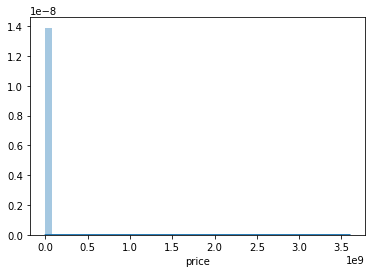

In [18]:
# Target distribution

sns.distplot(df1['price'])

In [11]:
pd.options.display.float_format = '{:.1f}'.format

In [12]:
print(np.median(df1['price']))
y = df1['price']
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

9377.0


count       509577.0
mean         54796.8
std        9575025.1
min              0.0
25%           3995.0
50%           9377.0
75%          17955.0
max     3600028900.0
Name: price, dtype: float64

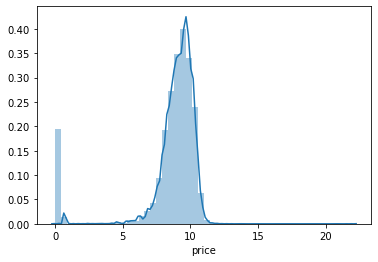

In [13]:

y_log = np.log1p(y)
sns.distplot(y_log)

In [45]:
# Chop out some outliers
df2 = df1[(df1['price'] >= np.percentile(df1['price'], 9.75)) &
          (df1['price'] <= np.percentile(df1['price'], 99.95))]
df2['price'].describe()

count   459749.0
mean     13776.4
std      11364.9
min        299.0
25%       5495.0
50%      10900.0
75%      18991.0
max     139500.0
Name: price, dtype: float64

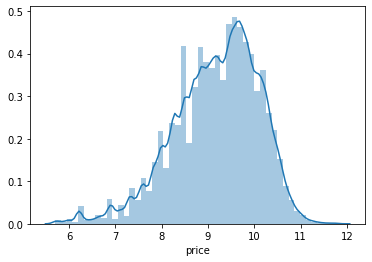

In [46]:
y = np.log1p(df2['price'])
sns.distplot(y)
# Now it's left skewed

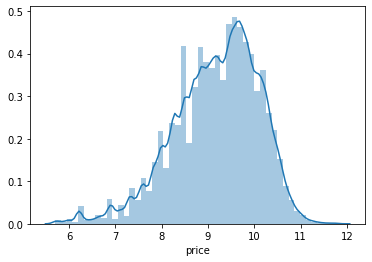

In [47]:
# y = y.replace(0, np.NaN)
# sns.distplot(y)

In [48]:
y.describe()

count   459749.0
mean         9.2
std          0.9
min          5.7
25%          8.6
50%          9.3
75%          9.9
max         11.8
Name: price, dtype: float64

In [49]:
np.e**9.3

10938.019208165186

In [ ]:
# Choose your evaluation metric(s).

# R^2, MAE isn't as good with the log transformation

In [57]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2.drop(columns=['county','Unnamed: 0']) , test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
225943,7043637257,indianapolis,3450,2005.0,jeep,liberty,good,6 cylinders,gas,nan,...,automatic,NaN,4wd,NaN,NaN,NaN,https://images.craigslist.org/00b0b_g1B1kbclS9...,in,40.5,-86.1
334185,7041819855,greensboro,2500,2004.0,mercedes-benz,benz c300,NaN,NaN,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00909_QcEiEKdFJ9...,nc,36.0,-79.5
202581,7047166292,boise,17495,2015.0,jeep,cherokee trailhawk,NaN,6 cylinders,gas,70858.0,...,automatic,1C4PJMBS9FW786291,4wd,NaN,SUV,NaN,https://images.craigslist.org/00808_2SZqpYwCaV...,id,43.6,-116.3
307300,7039681958,gulfport / biloxi,4895,2006.0,toyota,tundra,NaN,NaN,gas,231503.0,...,automatic,5TBRU34176S459802,rwd,NaN,truck,green,https://images.craigslist.org/01212_9sggs40gG9...,ms,30.6,-89.1
237874,7044924888,omaha / council bluffs,21988,2011.0,jeep,wrangler 4x4 rubicon 2dr su,NaN,NaN,gas,77543.0,...,manual,1J4BA6D19BL641459,NaN,NaN,NaN,NaN,https://images.craigslist.org/00t0t_jPJ4gK6VtZ...,ia,41.1,-96.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249141,7047758153,lexington,20000,2016.0,toyota,tacoma double cab trd,excellent,6 cylinders,gas,40000.0,...,automatic,3TMCZ5AN4GM042382,4wd,mid-size,pickup,blue,https://images.craigslist.org/00r0r_feVpWLQ14E...,ky,38.2,-83.4
40304,7039507374,kenosha-racine,19950,2017.0,toyota,rav4 xle,NaN,NaN,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00D0D_2CXTHNgSkV...,wi,43.1,-89.4
339796,7045049967,raleigh / durham / CH,10900,2015.0,ford,transit connect,excellent,4 cylinders,gas,103269.0,...,automatic,NaN,fwd,mid-size,van,white,https://images.craigslist.org/00q0q_bw0m2cYkWq...,nc,35.7,-78.6
219425,7048147683,"st louis, MO",8500,1992.0,ford,f-150,good,8 cylinders,gas,nan,...,manual,NaN,4wd,mid-size,truck,white,https://images.craigslist.org/00R0R_5ODPTpcOIE...,il,38.6,-90.3


In [58]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
178461,7038350946,sarasota-bradenton,26499,2016.0,jeep,wrangler unlimited,excellent,NaN,gas,26083.0,...,automatic,1C4BJWDG8GL287094,4wd,NaN,SUV,NaN,https://images.craigslist.org/00606_jx4LO7GfEE...,fl,27.3,-82.5
20251,7048452063,kennewick-pasco-richland,23321,2020.0,mitsubishi,outlander sport,NaN,4 cylinders,gas,5.0,...,automatic,JA4AR3AU8LU007637,4wd,NaN,SUV,NaN,https://images.craigslist.org/01616_44eY8pILcB...,wa,45.4,-122.6
458836,7048280520,greenville / upstate,3500,2005.0,ford,500,NaN,NaN,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00303_3Gh9HtBzfo...,sc,34.9,-82.2
478185,7038589301,tri-cities,10900,2011.0,nissan,titan,excellent,8 cylinders,gas,172379.0,...,automatic,1N6BA0EJ6BN306498,4wd,NaN,pickup,white,https://images.craigslist.org/00c0c_kJActEmrye...,tn,nan,nan
367098,7049558062,buffalo,6899,2015.0,fiat,500 pop,good,4 cylinders,gas,75690.0,...,automatic,3C3CFFAR1FT555535,fwd,sub-compact,hatchback,blue,https://images.craigslist.org/00A0A_fzSIS6zu83...,ny,43.0,-78.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79302,7042444678,bakersfield,22995,2015.0,ford,f-150,NaN,6 cylinders,gas,54253.0,...,automatic,1FTEW1E8XFKE05949,4wd,NaN,pickup,white,https://images.craigslist.org/00g0g_bitxPKe2YH...,ca,36.6,-120.3
201887,7048324403,boise,53882,2018.0,ram,2500,NaN,NaN,diesel,32189.0,...,automatic,3C6UR5GL8JG109735,4wd,NaN,pickup,white,https://images.craigslist.org/00I0I_a3qz99Efae...,id,43.6,-116.3
339112,7046447063,raleigh / durham / CH,5500,2006.0,chrysler,300c,good,8 cylinders,gas,97700.0,...,automatic,NaN,4wd,full-size,sedan,silver,https://images.craigslist.org/00A0A_7RhDImAVGu...,nc,37.8,-92.2
39410,7038483828,janesville,6500,2009.0,honda,accord,good,6 cylinders,gas,nan,...,automatic,NaN,fwd,NaN,NaN,black,https://images.craigslist.org/00c0c_27j5tbnaMG...,wi,42.6,-88.4


In [ ]:
#  Begin to clean and explore your data.
# - [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
# Question about what to do with price distribution: should I keep closing in the quartiles until the lower hump is left out?
# NaNs? Get rid of them?

In [ ]:
# Wrangle ML datasets¶
# x Continue to clean and explore your data.
#  For the evaluation metric you chose, what score would you get just by guessing?
#  Can you make a fast, first model that beats guessing?

In [64]:
len(train['price'])

372396

In [76]:
#  For the evaluation metric you chose, what score would you get just by guessing?
# R^2 for a flat line of the mean would be 0. Let's look at the MAE
list_of_mean = [train['price'].mean()] * len(train['price'])
mean_absolute_error(train['price'], list_of_mean)

8547.719219527464

In [89]:
# Let's do a univariate linear regression as a baseline as well
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train[['year']])
lr = LinearRegression()
model = lr.fit(imp_mean.transform(train[['year']]),train['price'])

print('MAE:', mean_absolute_error(train['price'], model.predict(imp_mean.transform(train[['year']]))))
print('R^2:', r2_score(train['price'], model.predict(imp_mean.transform(train[['year']]))))
# Alrighty then. Got some baselines!

MAE: 7729.479226215915
R^2: 0.11427889498536492
